# Notebook on linear regression

hi guys, this for this first notebook I will do a linear regression on a hand-crafted dataset.

First, we will need to import the numpy library and matplotlib.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact

## The dataset

Then, we will create a hand-crafted dataset. For that we create an x array, we compute y = w*x + b and we add noise to it.

In [61]:
def afficher_dataset(x,y) :

    plt.scatter(x,y)

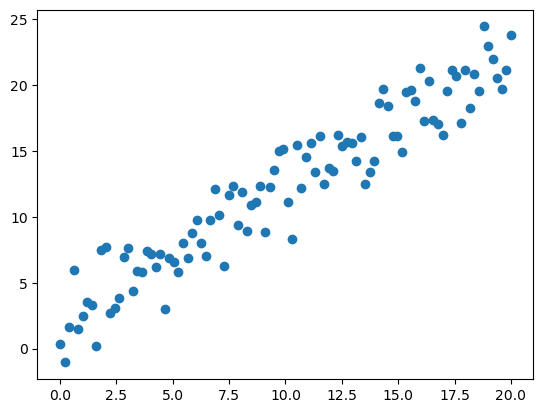

In [62]:
x = np.linspace(0, 20, 100)

w = 1.
b = 2.

y_clean = w*x + b

noise = np.random.normal(0,2,len(x))

y_noisy = y_clean + noise

afficher_dataset(x,y_noisy)

## Trying a fit with random parameters

Our dataset is built. Now, we will proceed to a linear regression, using gradient descent.

We will act as if we didnt know the coeffiscients w and b. We will initialize w and b to random numbers, and the algorithm will progressively fit the points.

In [47]:
def afficher_fit(x,y,f) :
    
    plt.scatter(x, y)
    plt.plot(x,f)
    

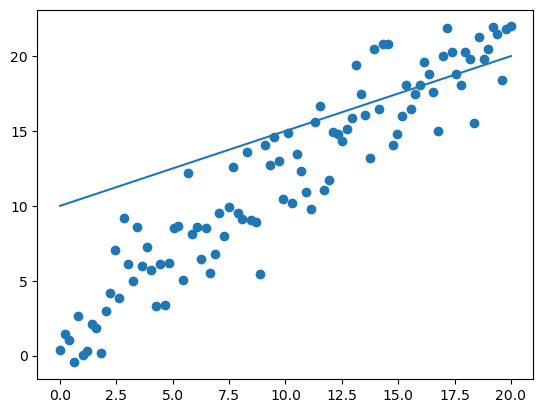

In [48]:
w_init = 0.5
b_init = 10

f = w_init*x + b_init

afficher_fit(x,y_noisy, f)

## Calculating the Mean Squared Error

To know if the linear curve is fitting well the data, we use the Mean Squared Error (MSE). It is an indicator of how good we are, compared to other fits. The goal is to find the fit that minimizes the MSE. You can play with values of w and b, and try to find the best fit (i.e. the red lines are the shortest on average.

In [49]:
def compute_cost(y,f):
    
    m = len(y)
    
    cost = (1/ (2*m)) * np.sum((f - y)**2)
    
    return cost

In [140]:
def update_curve(w=1,b=0):
    plt.scatter(x,y_noisy)
    f = w * x + b
    plt.plot(x, f)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Linear fit')
    plt.xlim(-1, 21)  # Set the x-axis limits
    plt.ylim(-1,25) # Set the y-axis limits
    
    for i in range(len(x)):
        point1_x = x[i]
        point1_y = y_noisy[i]
        point2_x = x[i]
        point2_y = f[i]
        plt.plot([point1_x, point2_x], [point1_y, point2_y], 'r--')  # Plot the red vertical line

    plt.draw()  # Update the existing plot
    print("cost = ",compute_cost(y_noisy,f))
    
interact(update_curve, w=(0.6, 2, 0.1), b=(-2, 2, 0.2))

interactive(children=(FloatSlider(value=1.0, description='w', max=2.0, min=0.6), FloatSlider(value=0.0, descri…

<function __main__.update_curve(w=1, b=0)>

## Performing Gradient Descent

The MSE is the mean of the squared vertical distances between the dataset and the curve. We perform the mean of each points of the dataset. Now the idea behind gradient descent is to calculate the derivative of the cost function with respect to w and b, and moving toward a reduced value of the cost function (for exemple, if the derivative of the cost function with respect to w is positive, then it means the cost increases when w increases. Therefore, we need to diminish w. We repeat that iteratively until a variation on w doesn't change much the value of the cost function). 

In [132]:
def compute_gradient(x, y, w, b): 

    # Number of training examples
    m = len(x)    
    f = w * x + b 
    dw = 1/m * np.dot((f - y),x)
    db = 1/m * np.sum(f-y) 
        
    return dw, db

In [133]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function): 
    """
    Performs gradient descent to fit w,b. Updates w,b by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      x (ndarray (m,))  : Data, m examples 
      y (ndarray (m,))  : target values
      w_in,b_in (scalar): initial values of model parameters  
      alpha (float):     Learning rate
      num_iters (int):   number of iterations to run gradient descent
      cost_function:     function to call to produce cost
      gradient_function: function to call to produce gradient
      
    Returns:
      w (scalar): Updated value of parameter after running gradient descent
      b (scalar): Updated value of parameter after running gradient descent
      J_history (List): History of cost values
      p_history (list): History of parameters [w,b] 
      """
    
    # An array to store cost J and w's at each iteration primarily for later
    J_history = []
    p_history = []
    b = b_in
    w = w_in
    
    for i in range(num_iters):
        
        f = w*x + b  
        plt.plot(x,f)
        # Save cost J at each iteration
        if i < 100000 :      # prevent resource exhaustion 
            J_history.append( cost_function(y,f))
            p_history.append([w,b])
        
        # Calculate the gradient and update the parameters using gradient_function
        dw, db = gradient_function(x, y, w , b) 
        
        # Update Parameters using equation (3) above
        b = b - alpha * db                            
        w = w - alpha * dw                            
        
        
        
        
       
    
    return w, b, J_history, p_history #return w and J,w history for graphing

(w,b) found by gradient descent: (  1.2041, -0.8125)
cost : 2.9242267489317806


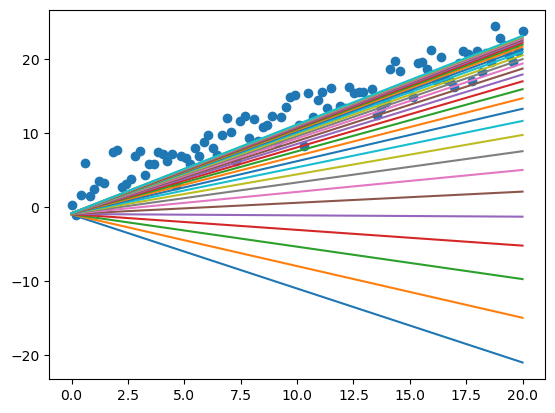

In [134]:
# initialize parameters
w_init = -1
b_init = -1
# some gradient descent settings
iterations = 30
alpha = 0.001

afficher_dataset(x,y_noisy)

# run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(x ,y_noisy, w_init, b_init, alpha, 
                                                    iterations, compute_cost, compute_gradient)

print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

f = w_final * x + b_final
print("cost :",compute_cost(y_noisy,f))


## Variation of the Cost function with the number of iterations

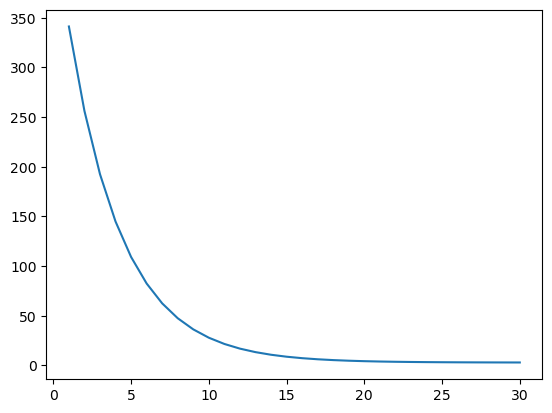

In [135]:
it = np.linspace(1,len(J_hist), len(J_hist))

plt.plot(it, J_hist)

## Updated values of w on the (w, J) curve

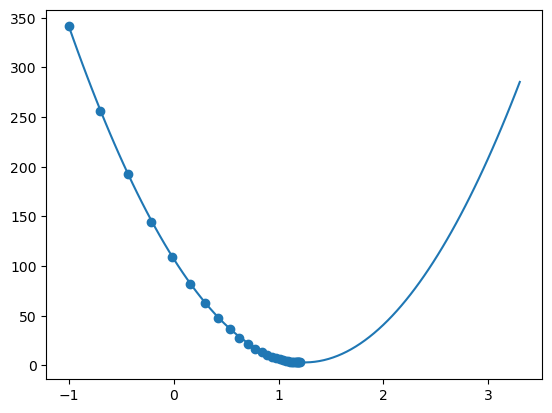

In [136]:
w = np.linspace(-1,3.3, 100)
b = -1
J = []

m = len(w)
for i in range(m) :
    f = w[i]* x + b
    cost = 1/(2*m) * np.sum((f - y_noisy)**2)
    J.append(cost)

plt.plot(w,J)

p_hist = np.array(p_hist)
J_hist = np.array(J_hist)
plt.scatter(p_hist[:,0], J_hist)
    

Felicitations, vous avez terminé ce Notebook sur la regression linéaire automatique.